In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#First we approximate the values of T_P and T_D

In [7]:
A = pd.read_csv("RandomBallCollisionDetectorTimeEstimation3D/RandomBallCollisionDetectorTimeEstimation3D/Data.csv")

In [8]:
B = A.to_numpy()

In [9]:
def DataSetPrep(Dataset):
    #change the (N, K, E[T]) fields in dataset to (N, 32K(K-1)(N-1)^3/N^6, E[T])
    Dat = []
    for x in range(len(Dataset)):
        n = Dataset[x][0]
        k = Dataset[x][1]
        t = Dataset[x][2]
        Dat.append([n**3, 32*k*(k-1)*(((n-1)/(n*n))**3), t])
    return Dat

In [10]:
def SampleDatasetToLinearRegForm(Dataset):
    X = []
    Y = []
    for d in Dataset:
        X.append([d[0], d[1], 1])
        Y.append(d[2])
    return (np.array(X), np.array(Y))

In [11]:
C = DataSetPrep(B)

In [12]:
D = SampleDatasetToLinearRegForm(C)

In [13]:
def linearRegression(X, Y):
    Vars = np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), np.matmul(X.transpose(), Y))
    return Vars

In [14]:
T_p, T_d, C = linearRegression(D[0], D[1])

In [15]:
print(T_p, T_d, C)
print(T_d/T_p)

0.0001389100022844617 2.873268245571894e-05 0.028829640310304994
0.20684387001074106


In [18]:
#Now we bring in the checker data to check if the algorithm is correct or not

In [19]:
DataChecker = pd.read_csv("RandomBallCollisionDetectorTimeEstimation3D/RandomBallCollisionDetectorTimeEstimation3D/MinData.csv").to_numpy()

In [20]:
def CorrectFunction(Y):
    ratio = 0.2
    return (np.power(32 * Y * (Y-1) * ratio, (1/6))).astype(np.int32)

In [21]:
X = DataChecker[:,0]
Y = CorrectFunction(X)

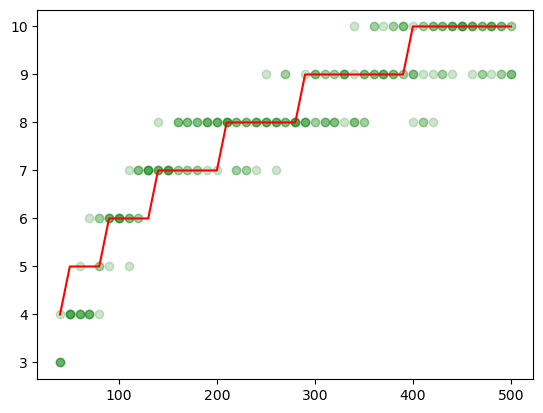

In [38]:
plt.scatter(DataChecker[:,0], DataChecker[:,1], color = 'green', alpha = (1/5))
plt.plot(X, Y, color='red')

In [23]:
#we see that the prediciton fits pretty well top the data. The only places its having problems is on low values of K
#This is because low K value requires low N values as we made this approximation N-1 ≈ N, which creates in accuracies on lower N values